**Problem 8:	Demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.**

In [31]:
# Problem 8: Decision Tree using ID3 Algorithm
# Dataset: Heart Disease Prediction (UCI)

In [32]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [33]:
sns.set(style="whitegrid", palette="pastel")

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
file_path = '/content/drive/MyDrive/Data Science_Lab/heart.csv'
sayem = pd.read_csv(file_path)

In [36]:
print("First 5 Rows:")
display(sayem.head())

First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
print("\n Dataset Information:")
sayem.info()


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [38]:
print("\n Missing Values:")
print(sayem.isnull().sum())


 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [39]:
# Split Data into Features and Target
X = sayem.drop('target', axis=1)
y = sayem['target']

In [40]:
# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("\n Data split complete: 80% training, 20% testing.")


 Data split complete: 80% training, 20% testing.


In [41]:
# Train Decision Tree using ID3 (Entropy)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
print("\n Decision Tree (ID3) model trained successfully!")


 Decision Tree (ID3) model trained successfully!


In [42]:
# Make Predictions
y_pred = model.predict(X_test)

In [43]:
# MODEL EVALUATION
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

In [56]:
# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [44]:
# Accuracy Score
print(f"\n Model Accuracy: {accuracy*100:.2f}%")


 Model Accuracy: 98.54%


/tmp/ipython-input-466306400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=sayem, palette='coolwarm', ax=axes[0,1])
/tmp/ipython-input-466306400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='Spectral', ax=axes[0,2])
/tmp/ipython-input-466306400.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=axes[1,1], palette='cool')


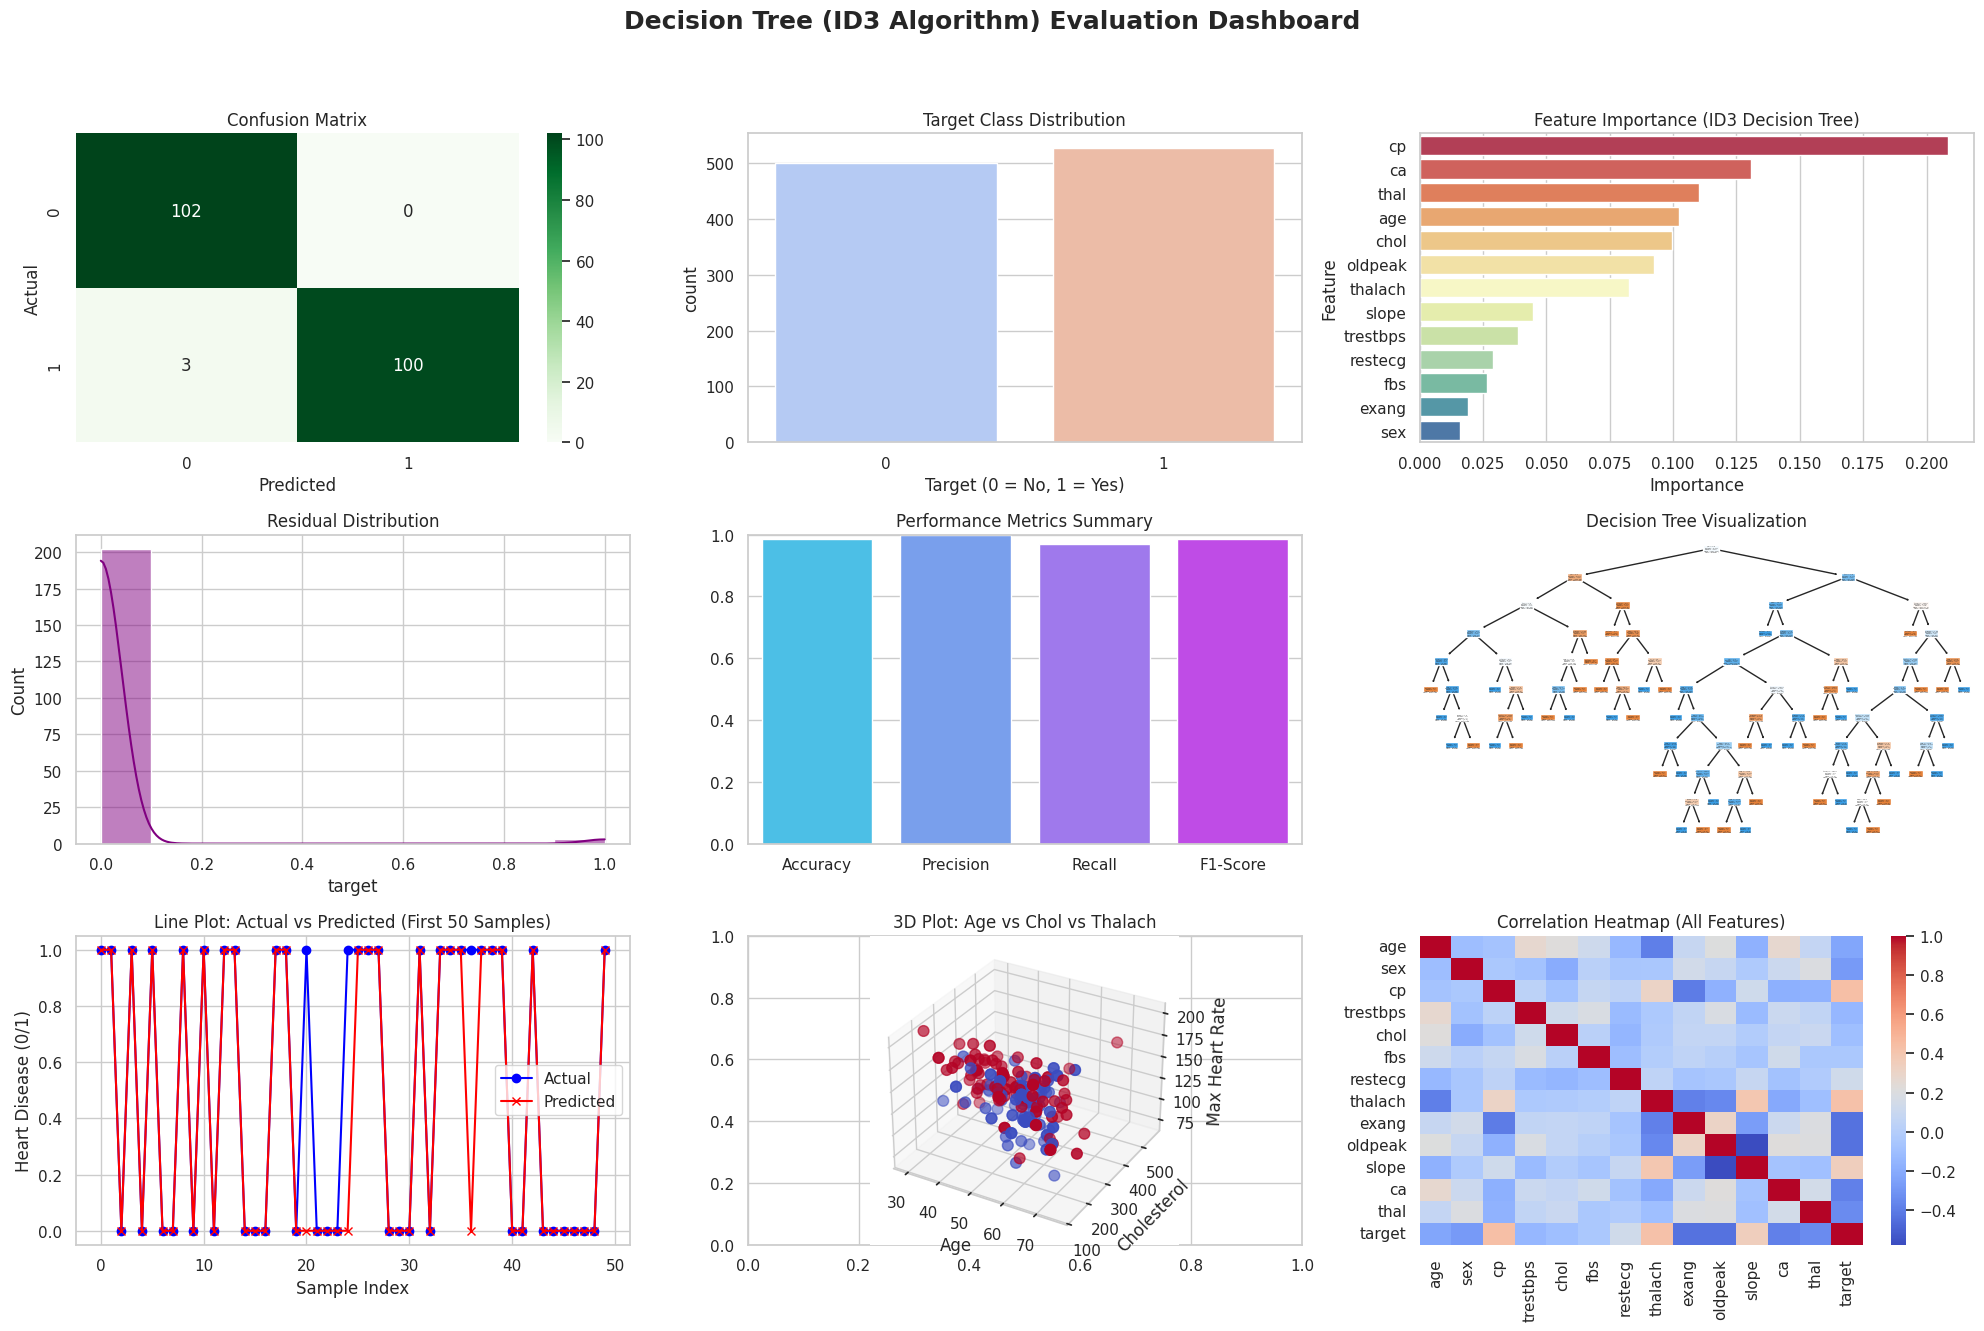

In [48]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))  # 3 rows, 3 columns now
fig.suptitle("Decision Tree (ID3 Algorithm) Evaluation Dashboard", fontsize=18, fontweight='bold')

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0,0])
axes[0,0].set_title("Confusion Matrix")
axes[0,0].set_xlabel("Predicted")
axes[0,0].set_ylabel("Actual")

# Target Distribution
sns.countplot(x='target', data=sayem, palette='coolwarm', ax=axes[0,1])
axes[0,1].set_title("Target Class Distribution")
axes[0,1].set_xlabel("Target (0 = No, 1 = Yes)")

# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance, palette='Spectral', ax=axes[0,2])
axes[0,2].set_title("Feature Importance (ID3 Decision Tree)")

# Residual Distribution (Error Spread)
residuals = y_test - y_pred
sns.histplot(residuals, bins=10, kde=True, color='purple', ax=axes[1,0])
axes[1,0].set_title("Residual Distribution")

# Accuracy Summary Bar Chart
metrics = {
    'Accuracy': accuracy,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score']
}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=axes[1,1], palette='cool')
axes[1,1].set_title("Performance Metrics Summary")
axes[1,1].set_ylim(0, 1)

# Decision Tree Structure (Mini View)
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease','Disease'], ax=axes[1,2])
axes[1,2].set_title("Decision Tree Visualization")

# Line Plot (Actual vs Predicted Comparison)
axes[2,0].plot(y_test.values[:50], label='Actual', marker='o', color='blue')
axes[2,0].plot(y_pred[:50], label='Predicted', marker='x', color='red')
axes[2,0].set_title("Line Plot: Actual vs Predicted (First 50 Samples)")
axes[2,0].set_xlabel("Sample Index")
axes[2,0].set_ylabel("Heart Disease (0/1)")
axes[2,0].legend()

# 3D Plot (Age vs Cholesterol vs Thalach)
ax3d = fig.add_subplot(3, 3, 8, projection='3d')
ax3d.scatter(
    X_test['age'],
    X_test['chol'],
    X_test['thalach'],
    c=y_pred, cmap='coolwarm', s=60
)
ax3d.set_xlabel('Age')
ax3d.set_ylabel('Cholesterol')
ax3d.set_zlabel('Max Heart Rate')
ax3d.set_title("3D Plot: Age vs Chol vs Thalach")

# Correlation Heatmap (Extra Attractive Addition)
sns.heatmap(sayem.corr(), cmap='coolwarm', annot=False, ax=axes[2,2])
axes[2,2].set_title("Correlation Heatmap (All Features)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [49]:
# CLASSIFY A NEW SAMPLE
# Create a clear DataFrame for better readability
# Each value matches the corresponding column name
new_patient = pd.DataFrame([{
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 140,
    'exang': 1,
    'oldpeak': 0,
    'slope': 2,
    'ca': 1,
    'thal': 3
}])

In [50]:
print("New Patient Data:")
display(new_patient)

New Patient Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,130,250,0,1,140,1,0,2,1,3


In [51]:
# Predict using the trained model
new_prediction = model.predict(new_patient)
new_proba = model.predict_proba(new_patient)[0]

In [52]:
# Display clear, colorful results
print("Model Prediction Results:")
if new_prediction[0] == 1:
    print("The patient is **likely to have Heart Disease**")
else:
    print("The patient is **not likely to have Heart Disease.**")

print(f"\n Prediction Probability:")
print(f" - No Disease (0): {new_proba[0]*100:.2f}%")
print(f" - Heart Disease (1): {new_proba[1]*100:.2f}%")

Model Prediction Results:
The patient is **not likely to have Heart Disease.**

 Prediction Probability:
 - No Disease (0): 100.00%
 - Heart Disease (1): 0.00%


/tmp/ipython-input-2746068070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['No Disease', 'Heart Disease'], y=new_proba, palette=['green', 'red'])


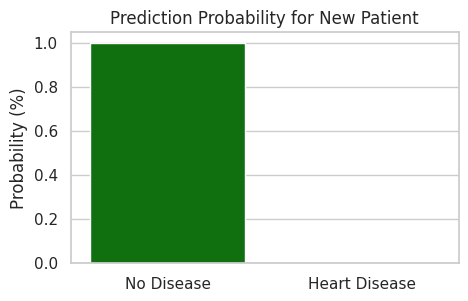

In [53]:
# Visualize probability as a bar chart
plt.figure(figsize=(5,3))
sns.barplot(x=['No Disease', 'Heart Disease'], y=new_proba, palette=['green', 'red'])
plt.title("Prediction Probability for New Patient")
plt.ylabel("Probability (%)")
plt.show()

In [55]:
# FINAL SUMMARY
print(f"""
MODEL SUMMARY
Algorithm Used: Decision Tree (ID3 - Entropy)
Dataset: Heart Disease Prediction
Accuracy: {accuracy*100:.2f}%
Major Evaluation Metrics:
   - Precision: {metrics['Precision']:.2f}
   - Recall: {metrics['Recall']:.2f}
   - F1-Score: {metrics['F1-Score']:.2f}

The ID3 Decision Tree model successfully classifies
patients into 'Heart Disease' or 'No Disease' categories.
""")


MODEL SUMMARY
Algorithm Used: Decision Tree (ID3 - Entropy)
Dataset: Heart Disease Prediction
Accuracy: 98.54%
Major Evaluation Metrics:
   - Precision: 1.00
   - Recall: 0.97
   - F1-Score: 0.99

The ID3 Decision Tree model successfully classifies
patients into 'Heart Disease' or 'No Disease' categories.

